In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import patheffects
import seaborn as sns
# pd.options.display.float_format = '{:,.0f}'.format

In [11]:
oil_data = pd.read_csv('oil-proved-reserves.csv')
world_oil_data = oil_data[oil_data.Entity=='World'].reset_index(drop=True)
display(world_oil_data)

,Entity,Code,Year,Oil - Proved reserves
2783,World,OWID_WRL,1980,"93,109,504,400"
2784,World,OWID_WRL,1981,"94,271,706,056"
2785,World,OWID_WRL,1982,"98,513,134,984"
2786,World,OWID_WRL,1983,"100,136,586,880"
2787,World,OWID_WRL,1984,"101,803,744,064"
2788,World,OWID_WRL,1985,"105,608,499,304"
2789,World,OWID_WRL,1986,"119,975,544,040"
2790,World,OWID_WRL,1987,"124,274,835,212"
2791,World,OWID_WRL,1988,"136,330,550,576"
2792,World,OWID_WRL,1989,"136,423,829,080"


,data_volume_zp
2010,2
2011,5
2012,6
2013,9
2014,12
2015,16
2016,18
2017,26
2018,33
2019,41


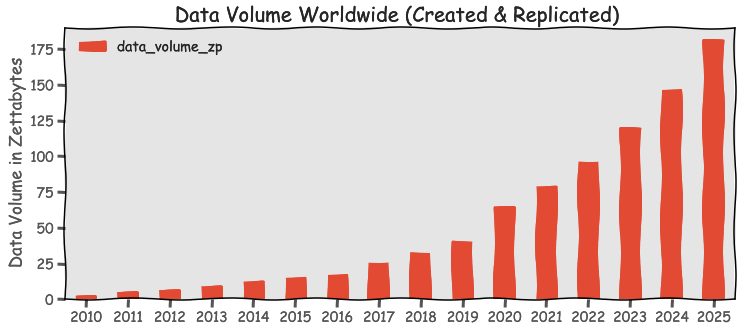

In [35]:
data_volume = {2010:2, 2011:5, 2012:6.5, 2013:9,
               2014:12.5, 2015:15.5, 2016:18, 2017:26,
               2018:33, 2019:41, 2020:64.2, 2021:79,
               2022:97, 2023:120, 2024:147, 2025:181}
data_volume = pd.DataFrame.from_dict(data_volume, orient='index')
data_volume = data_volume.rename(columns={0:'data_volume_zp'})
display(data_volume)

with plt.xkcd():
  plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=0)]
  data_volume.plot(kind='bar',figsize=(12,5))
  plt.title('Data Volume Worldwide (Created & Replicated) ')
  plt.ylabel('Data Volume in Zettabytes')
  plt.xticks(rotation=0)

# E-Commerce

In [2]:
data = pd.DataFrame(
  {
    'Year':range(2017, 2023), 
    'Transaction_Value':[42.2, 105.6, 205.5, 266.3, 401, 476.3]
  }
)
data

,Year,Transaction_Value
0,2017,42.2
1,2018,105.6
2,2019,205.5
3,2020,266.3
4,2021,401.0
5,2022,476.3


In [3]:
data['increases'] = (data.Transaction_Value.diff(1) / data.Transaction_Value.shift(1) * 100).round(2)
data

,Year,Transaction_Value,increases
0,2017,42.2,NaN
1,2018,105.6,150.24
2,2019,205.5,94.60
3,2020,266.3,29.59
4,2021,401.0,50.58
5,2022,476.3,18.78


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


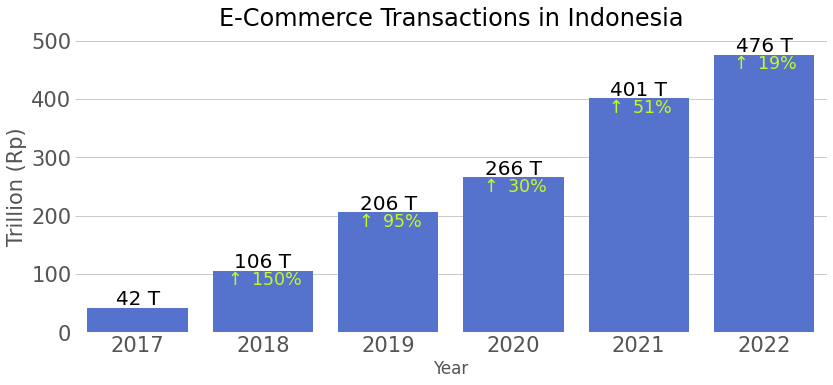

In [15]:
# with plt.xkcd():
# sns.regplot(data.Year, data.Transaction_Value)
plt.rcParams["text.usetex"] 
# plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 21
plt.rcParams['ytick.labelsize'] = 21
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5),frameon=False)

plots = sns.barplot(data.Year, data.Transaction_Value, color='#4169E1')
for i, bar in enumerate(plots.patches):
  
  if i==0:
    plots.annotate(f'{bar.get_height():.0f} T',
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=20, xytext=(0, 8),
                  textcoords='offset points')
  else:
    plots.annotate(f'{bar.get_height():.0f} T',
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=20, xytext=(0, 8),
                  textcoords='offset points')
    plots.annotate(r'$\uparrow$ '+f'{data.increases.loc[i]:.0f}%',
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()-30), ha='center', va='center',
                  size=17.5, xytext=(0, 8), color='#c6f91f', #'#32CD32',#'#00A36C',
                  textcoords='offset points')
                  
plt.title('E-Commerce Transactions in Indonesia', y=1.03, fontsize=24)
plt.ylabel('Trillion (Rp)', fontsize=21); #plt.xlabel('Year',fontsize=21);
plt.box(False)
plt.savefig('plot.png', transparent=True, bbox_inches='tight', dpi=1000)
